In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Importing Algorightms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('telco.csv')

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
df.drop(['Dependents', 'customerID','InternetService','MultipleLines','OnlineSecurity', 'OnlineBackup','MonthlyCharges','DeviceProtection', 'TotalCharges', 'SeniorCitizen','tenure'], axis = 1, inplace = True)

In [19]:
df

,gender,Partner,PhoneService,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [20]:
#Mapping
df['gender'] = df['gender'].map({'Male':0,'Female':1})
df['Partner'] = df['Partner'].map({'Yes':0,'No':1})
df['PhoneService'] = df['PhoneService'].map({'Yes':0,'No':1, 'No phone service':2})
df['TechSupport'] = df['TechSupport'].map({'Yes':0,'No':1})
df['StreamingTV'] = df['StreamingTV'].map({'Yes':0,'No':1})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes':0,'No':1})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes':0,'No':1})
df['Contract'] = df['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2})
df['PaymentMethod'] = df['PaymentMethod'].map({'Electronic check':0,'Mailed check':1, 'Bank transfer (automatic)':2,'Credit card (automatic)':3})
df['Churn'] = df['Churn'].map({'Yes':0,'No':1})


In [21]:
df

,gender,Partner,PhoneService,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,0,1,1.0,1.0,1.0,0,0,0,1
1,0,1,0,1.0,1.0,1.0,1,1,1,1
2,0,1,0,1.0,1.0,1.0,0,0,1,0
3,0,1,1,0.0,1.0,1.0,1,1,2,1
4,1,1,0,1.0,1.0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0.0,0.0,0.0,1,0,1,1
7039,1,0,0,1.0,0.0,0.0,1,0,3,1
7040,1,0,1,1.0,1.0,1.0,0,0,0,1
7041,0,0,0,1.0,1.0,1.0,0,0,1,0


In [22]:
print(df)

      gender  Partner  PhoneService  TechSupport  StreamingTV  \
0          1        0             1          1.0          1.0   
1          0        1             0          1.0          1.0   
2          0        1             0          1.0          1.0   
3          0        1             1          0.0          1.0   
4          1        1             0          1.0          1.0   
...      ...      ...           ...          ...          ...   
7038       0        0             0          0.0          0.0   
7039       1        0             0          1.0          0.0   
7040       1        0             1          1.0          1.0   
7041       0        0             0          1.0          1.0   
7042       0        1             0          0.0          0.0   

      StreamingMovies  Contract  PaperlessBilling  PaymentMethod  Churn  
0                 1.0         0                 0              0      1  
1                 1.0         1                 1              1      1

In [23]:
df

,gender,Partner,PhoneService,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,0,1,1.0,1.0,1.0,0,0,0,1
1,0,1,0,1.0,1.0,1.0,1,1,1,1
2,0,1,0,1.0,1.0,1.0,0,0,1,0
3,0,1,1,0.0,1.0,1.0,1,1,2,1
4,1,1,0,1.0,1.0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0.0,0.0,0.0,1,0,1,1
7039,1,0,0,1.0,0.0,0.0,1,0,3,1
7040,1,0,1,1.0,1.0,1.0,0,0,0,1
7041,0,0,0,1.0,1.0,1.0,0,0,1,0


In [24]:
df.isnull().sum()

gender                 0
Partner                0
PhoneService           0
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
Contract               0
PaperlessBilling       0
PaymentMethod          0
Churn                  0
dtype: int64

In [27]:
#why didnt it work?
df.fillna({'TechSupport':df['TechSupport'].mean(),'StreamingTV':1,'StreamingMovies':1})

,gender,Partner,PhoneService,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,0,1,1.0,1.0,1.0,0,0,0,1
1,0,1,0,1.0,1.0,1.0,1,1,1,1
2,0,1,0,1.0,1.0,1.0,0,0,1,0
3,0,1,1,0.0,1.0,1.0,1,1,2,1
4,1,1,0,1.0,1.0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0.0,0.0,0.0,1,0,1,1
7039,1,0,0,1.0,0.0,0.0,1,0,3,1
7040,1,0,1,1.0,1.0,1.0,0,0,0,1
7041,0,0,0,1.0,1.0,1.0,0,0,1,0


In [28]:
df.isnull().sum()

gender                 0
Partner                0
PhoneService           0
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
Contract               0
PaperlessBilling       0
PaymentMethod          0
Churn                  0
dtype: int64

In [29]:
display(df)

,gender,Partner,PhoneService,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,0,1,1.0,1.0,1.0,0,0,0,1
1,0,1,0,1.0,1.0,1.0,1,1,1,1
2,0,1,0,1.0,1.0,1.0,0,0,1,0
3,0,1,1,0.0,1.0,1.0,1,1,2,1
4,1,1,0,1.0,1.0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0.0,0.0,0.0,1,0,1,1
7039,1,0,0,1.0,0.0,0.0,1,0,3,1
7040,1,0,1,1.0,1.0,1.0,0,0,0,1
7041,0,0,0,1.0,1.0,1.0,0,0,1,0


In [30]:
X = df[['gender','Partner','PhoneService','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','PaymentMethod']]
y = df['Churn']

In [31]:
#Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [35]:
dt_classifier = DecisionTreeClassifier()

In [36]:
#Training the model on DTC algorithm 
dt_classifier.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [37]:
predicted_value = dt_classifier.predict(X_test)

In [39]:
#Evaluate models performance
acc = accuracy_score(predicted_value, y_test)
cm = confusion_matrix(predicted_value, y_test)
cr = classification_report(predicted_value, y_test)

In [40]:
print(f'Accuracy: {acc}')
print(f'Confusion Matrix: \n{cm}')
print(f'Classification Report: \n{cr}')

Accuracy: 0.7530163236337828
Confusion Matrix: 
[[197 172]
 [176 864]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.53      0.53      0.53       369
           1       0.83      0.83      0.83      1040

    accuracy                           0.75      1409
   macro avg       0.68      0.68      0.68      1409
weighted avg       0.75      0.75      0.75      1409



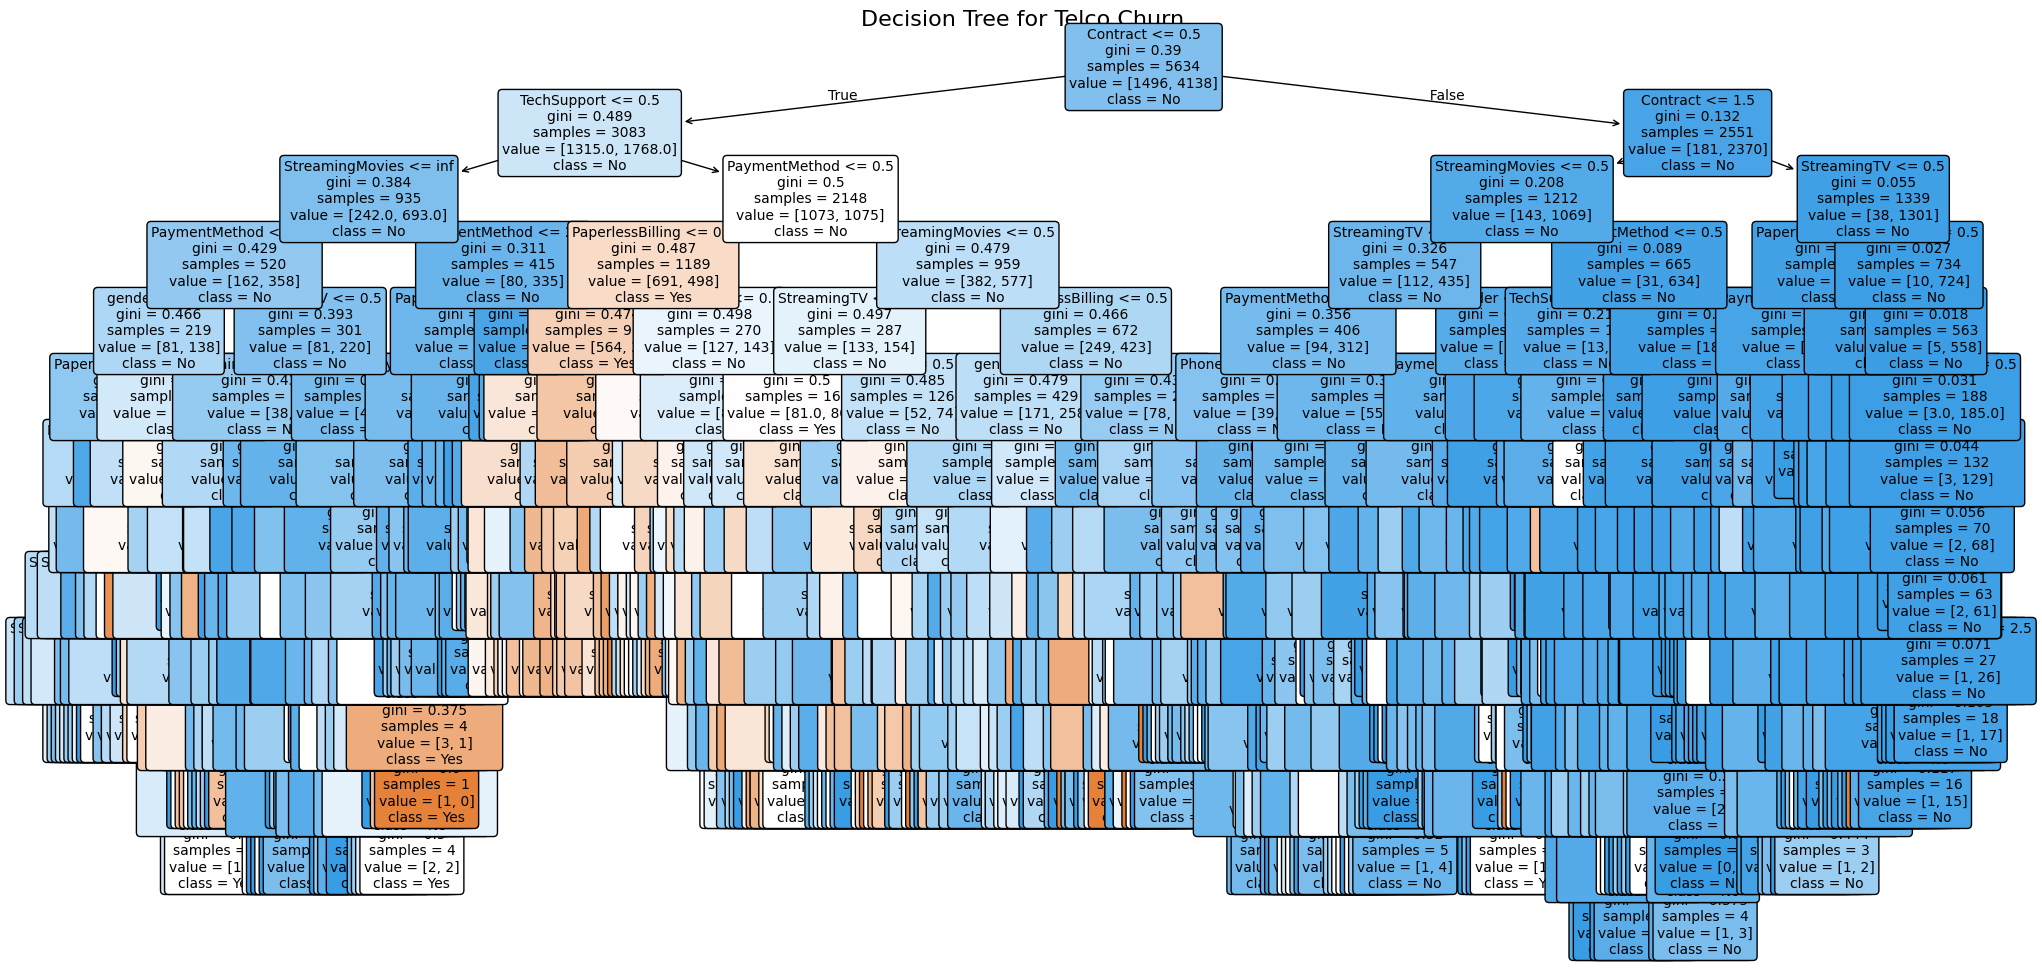

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(24, 12))

plot_tree(
    dt_classifier,
    feature_names=X.columns,
    class_names=["Yes", "No"],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Decision Tree for Telco Churn", fontsize=16)
plt.show()

Why not possible to remove all null values? 


Why so many true negative in confusion matrix?


No makes sense - females, no automatic payment, no upsells etc. - but for yes - not enough data? 


Explain classification report and accuracy in more detail 


What sense does tree make here - based on no additional features - lower probability of renewal - right side much bigger

What if test size and random st is adjusted? 


